# CV vs LB

In [37]:
import glob
import os.path
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

SCRIPT_PATH = os.path.join('..', 'scripts')
if SCRIPT_PATH not in sys.path:
    sys.path.append(SCRIPT_PATH)

from features import CATEGORICAL_FEATURES, VECTOR_FEATURES

pd.options.display.max_rows = 100
sns.set(font='Yu Gothic')

In [38]:
submissions = pd.read_csv('submissions.csv')
subs = pd.DataFrame()

y_labels = list(range(8))
y_rate = pd.DataFrame({'y': y_labels})
y_nunique_values = []
sub_paths = []
for sub_path in glob.glob(os.path.join('*', '*_submission.csv')):
    sub = pd.read_csv(sub_path)
    y_nunique_values.append(sub.y.nunique())
    sub_paths.append(os.path.basename(sub_path))
    y_rate_ = sub.y.value_counts(normalize=True).reset_index().rename(columns={'index': 'y', 'y': os.path.basename(sub_path)})
    y_rate = pd.merge(y_rate, y_rate_, how='left')
    
    if 'id' not in subs:
        subs = sub.copy()
        subs.rename(columns={'y': os.path.basename(sub_path)}, inplace=True)
    else:
        subs = pd.merge(subs, sub.rename(columns={'y': os.path.basename(sub_path)}))

y_rate.fillna(0, inplace=True)
y_rate = y_rate.T.reset_index().rename(columns={'index': 'filename'}).query("filename != 'y'")
submissions = pd.merge(submissions, y_rate, how='left')

y_nunique = pd.DataFrame({'filename': sub_paths, 'numUniqueY': y_nunique_values})
submissions = pd.merge(submissions, y_nunique, how='left')

submissions['expNo'] = submissions.filename.apply(lambda x: x[:3])

submissions

,filename,cv,train,valid,LB,Note,0,1,2,3,4,5,6,7,numUniqueY,expNo
0,002_submission.csv,Stratified-Kfold(K=5),0.216635,0.132093,0.13110,ロジスティック回帰。class_weight=`balanced`.とりあえず作った。,0.168806,0.304307,0.097078,0.132010,0.111542,0.112666,0.006093,0.067499,8,002
1,003_submission.csv,Stratified-Kfold(K=5),0.177389,0.146417,0.12748,ロジスティック回帰。とりあえず作った。,0.583885,0.317972,0.067114,0.030584,0.000444,0.000000,0.000000,0.000000,5,003
2,004_submission.csv,Stratified-Kfold(K=5),0.237700,0.119829,0.12597,KNN。とりあえず作った。,0.514050,0.315221,0.108791,0.056229,0.005354,0.000207,0.000030,0.000118,8,004
3,005_submission.csv,Stratified-Kfold(K=5),0.157788,0.122426,0.11130,SVM。とりあえず作った。,0.706312,0.253313,0.038955,0.001420,0.000000,0.000000,0.000000,0.000000,4,005
4,006_submission.csv,Stratified-Kfold(K=5),0.390510,0.151750,0.14547,SVM。class_weight=`balanced`.とりあえず作った。,0.184453,0.462583,0.097758,0.156531,0.088027,0.007690,0.000000,0.002958,7,006
5,007_submission.csv,Stratified-Kfold(K=5),0.267113,0.137523,0.12089,全特徴量を使用したKNN,0.545581,0.268990,0.057708,0.115476,0.011122,0.000355,0.000000,0.000769,7,007
6,008_submission.csv,Stratified-Kfold(K=5),1.026566,0.753488,0.11536,全特徴量を使用したSVM. class_weight を指定。Cは1.0,0.119143,0.284075,0.000532,0.535110,0.060755,0.000207,0.000000,0.000177,7,008
7,009_submission.csv,Stratified-Kfold(K=5),0.261876,0.146291,NaN,全特徴量を使用したSVM. class_weight は指定しない。Cは1.0,0.377337,0.252159,0.000059,0.370445,0.000000,0.000000,0.000000,0.000000,4,009
8,010_submission.csv,Stratified-Kfold(K=5),0.663369,0.175991,0.12663,全特徴量を使用したSVM. class_weight を指定。Cは10.0,0.252662,0.258252,0.008193,0.471279,0.009347,0.000148,0.000000,0.000118,7,010
9,012_submission.csv,Stratified-Kfold(K=5),0.913259,0.228066,0.14379,全特徴量を使用したSVM. class_weight を指定。Cは100,0.274048,0.301083,0.054957,0.362991,0.006655,0.000148,0.000000,0.000118,7,012


filename: submission filename  
cv: how to split train/valid set  
train: average cv metrics (train set)  
valid: average cv metrics (valid set)  
LB: Public leader board, if submitted  
0, 1, 2, 3, 4, 5, 6, 7: population of predicted label  

<Figure size 1008x1008 with 0 Axes>

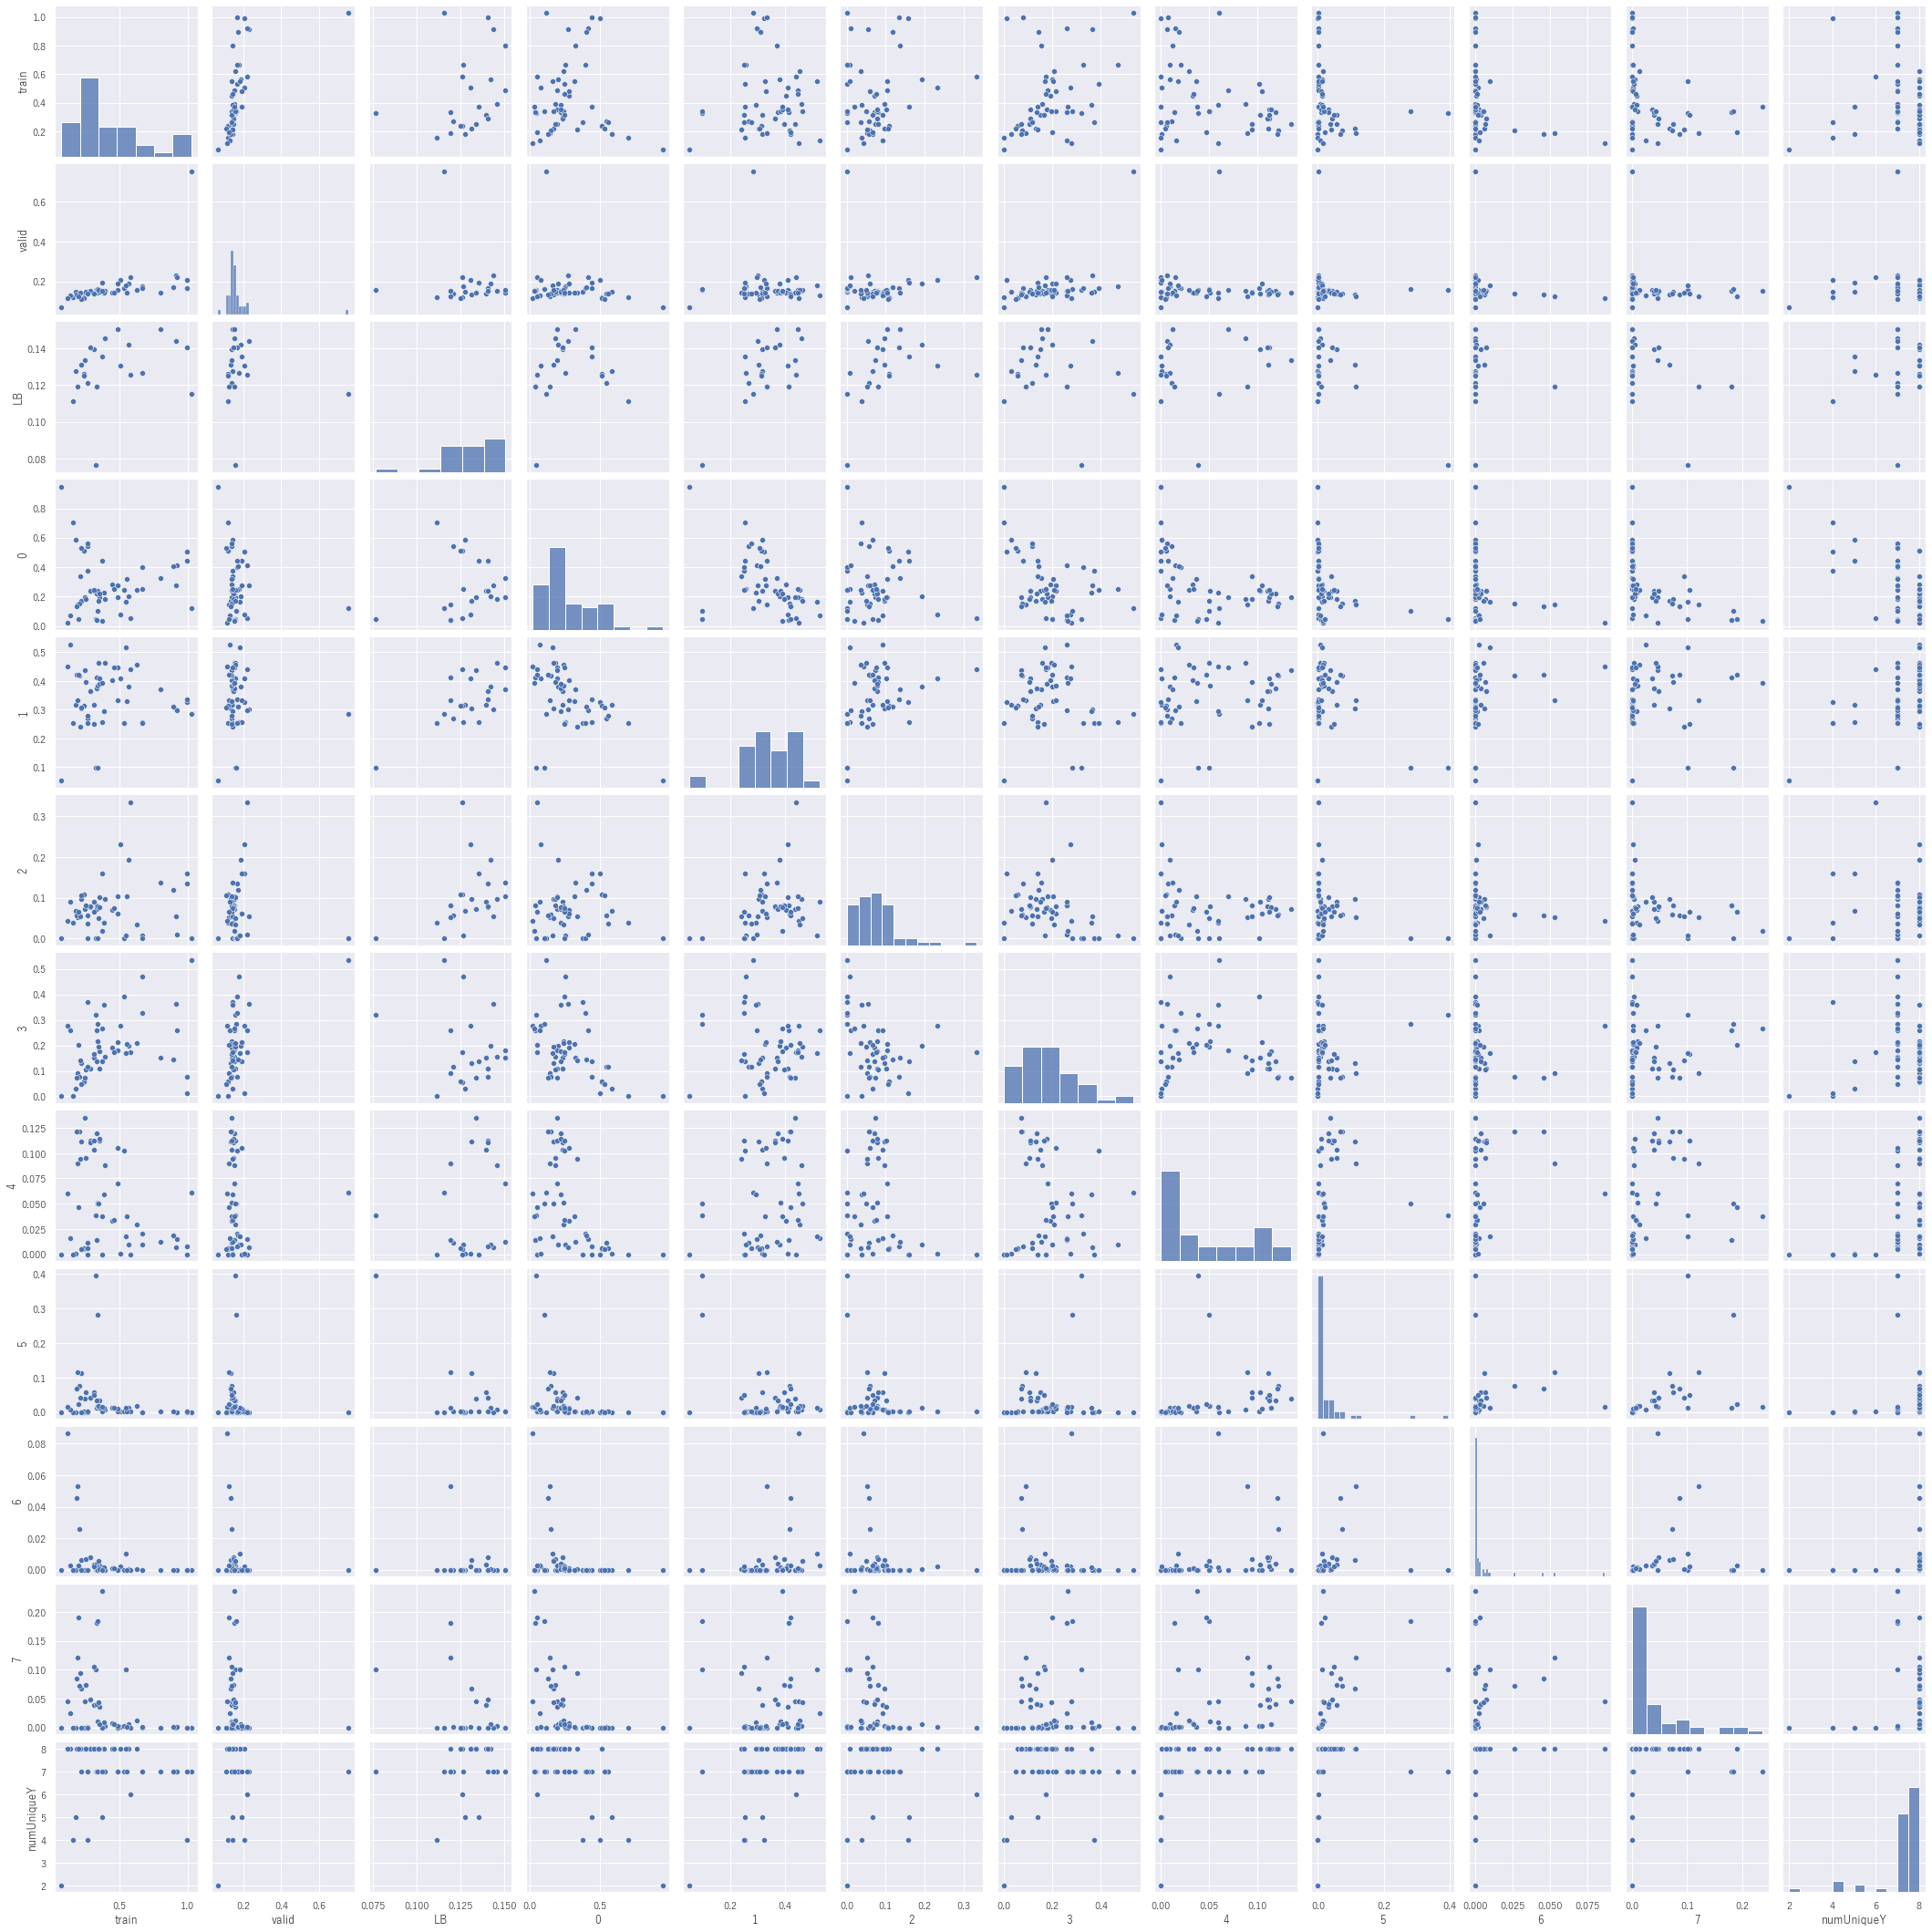

In [40]:
fig = plt.figure(figsize=(14., 14.))
sns.pairplot(submissions)
sns.despine()

<Figure size 1008x1008 with 0 Axes>

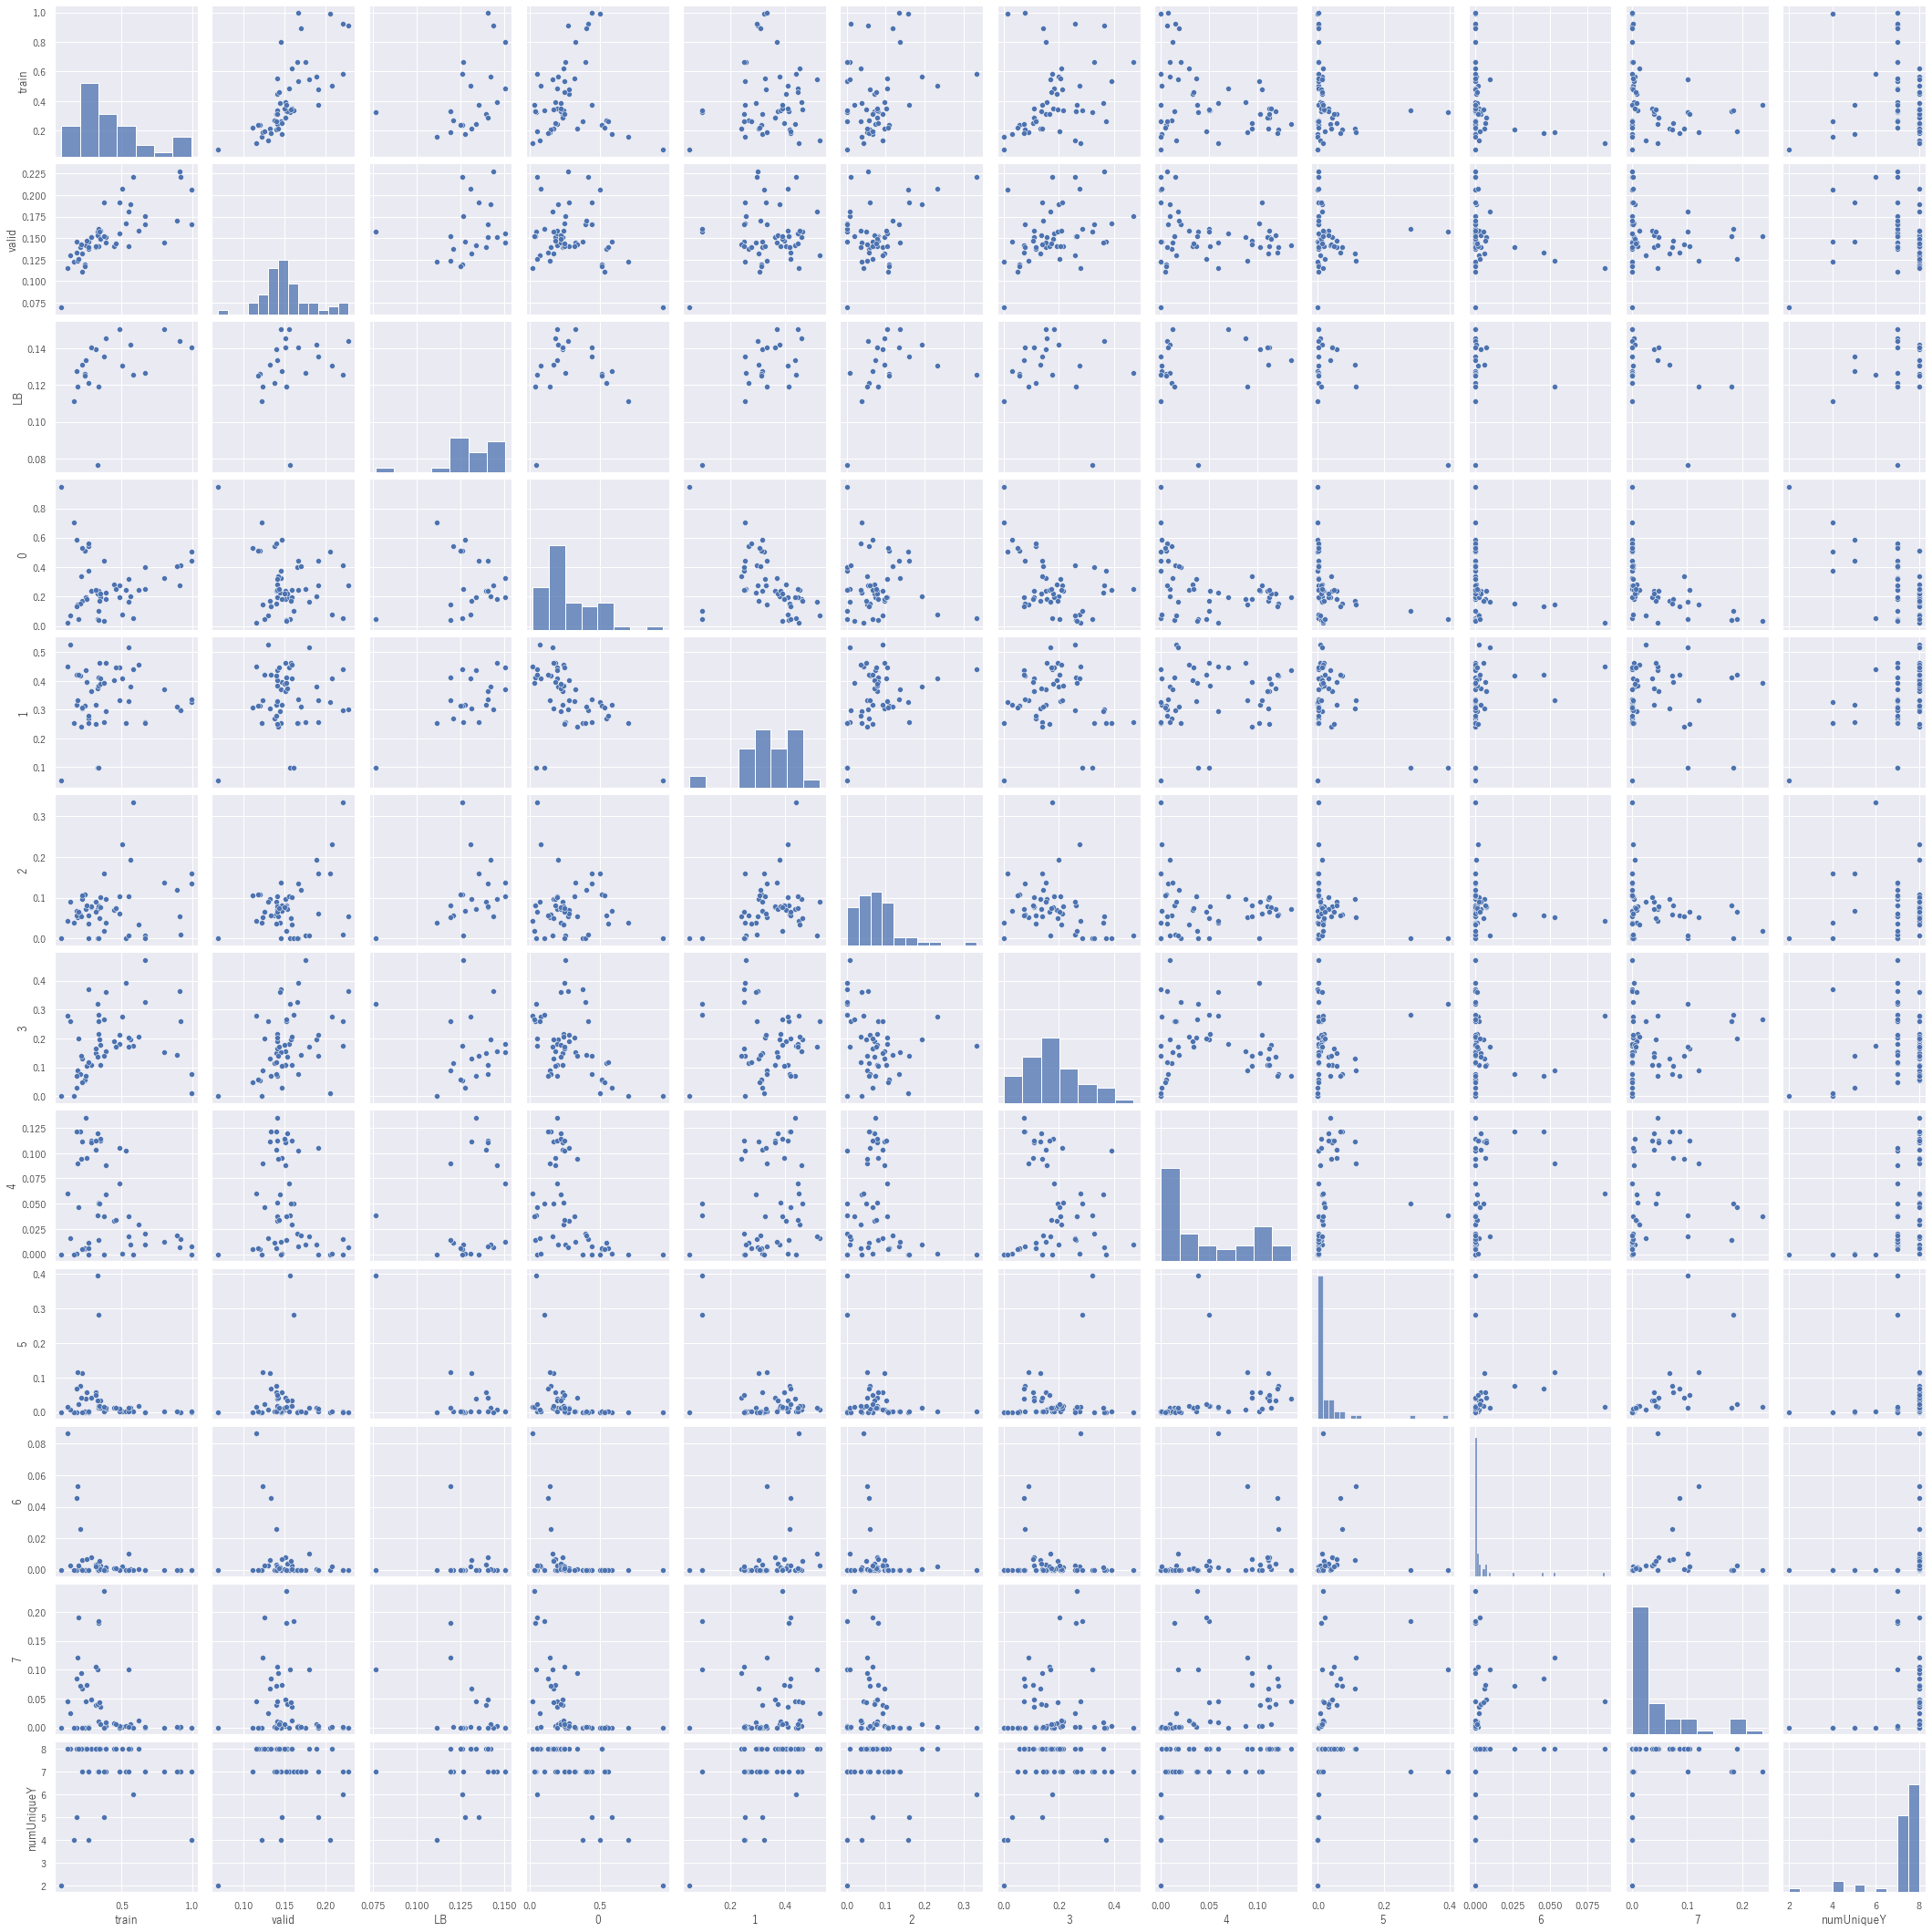

In [41]:
fig = plt.figure(figsize=(14., 14.))
sns.pairplot(submissions.query('filename != "008_submission.csv"'))
sns.despine()

In [11]:
subs

,id,002_submission.csv,003_submission.csv,004_submission.csv,005_submission.csv,006_submission.csv,007_submission.csv,008_submission.csv,009_submission.csv,010_submission.csv,...,052_submission.csv,053_submission.csv,054_submission.csv,055_submission.csv,056_submission.csv,057_submission.csv,058_submission.csv,059_submission.csv,060_submission.csv,061_submission.csv
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
1,1,5,1,0,1,1,3,1,0,0,...,1,1,1,1,1,1,1,1,1,1
2,2,4,3,1,2,2,0,3,3,3,...,3,2,3,3,3,3,3,4,2,4
3,3,1,0,0,0,1,0,3,3,3,...,1,1,1,1,1,3,1,1,1,1
4,4,1,0,1,0,1,1,1,1,1,...,1,1,1,4,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33803,33803,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0
33804,33804,0,0,1,0,1,0,3,3,3,...,1,1,0,0,1,0,1,1,1,1
33805,33805,7,0,1,0,1,0,3,0,3,...,3,3,0,0,0,0,1,1,1,1
33806,33806,4,2,0,0,3,0,3,3,3,...,1,5,3,2,4,4,3,3,5,5


# Tree feature importances

In [12]:
imp_df = pd.DataFrame()
for filepath in glob.glob(os.path.join('*', 'feature_importances.csv')):
    exp_no = os.path.split(filepath)[0]
    print(exp_no, filepath)
    imp_df_ = pd.read_csv(filepath)
    imp_df_ = imp_df_.groupby('feature').importance.median().reset_index()
    imp_df_['importanceRank'] = imp_df_.importance.rank(ascending=False)
    imp_df_['expNo'] = exp_no
    imp_df = pd.concat([imp_df, imp_df_])
print(f'{imp_df.expNo.nunique()} files found')
imp_df

017 017\feature_importances.csv
018 018\feature_importances.csv
019 019\feature_importances.csv
020 020\feature_importances.csv
021 021\feature_importances.csv
022 022\feature_importances.csv
050 050\feature_importances.csv
051 051\feature_importances.csv
052 052\feature_importances.csv
053 053\feature_importances.csv
054 054\feature_importances.csv
055 055\feature_importances.csv
056 056\feature_importances.csv
057 057\feature_importances.csv
058 058\feature_importances.csv
059 059\feature_importances.csv
060 060\feature_importances.csv
061 061\feature_importances.csv
18 files found


,feature,importance,importanceRank,expNo
0,10a,18.480120,363.0,017
1,10b,0.000000,462.0,017
2,10c,0.000000,462.0,017
3,10d,13.303220,374.0,017
4,10e,35.575600,335.0,017
...,...,...,...,...
13,isPitcherHandLeft,1.031536,15.0,061
14,numRunners,6.135176,8.0,061
15,pitcherID,6.190140,7.0,061
16,pitcherTeam,6.530474,6.0,061


In [13]:
imp_df.groupby('feature').importanceRank.describe().sort_values('50%').reset_index()

,feature,count,mean,std,min,25%,50%,75%,max
0,distDirU,6.0,79.666667,122.191107,1.0,1.000,1.00,167.500,251.0
1,pitcherID,18.0,70.722222,117.794340,1.0,1.000,2.50,154.000,352.0
2,Match,18.0,59.166667,101.847204,3.0,3.000,4.00,95.750,344.0
3,diststd,6.0,21.500000,39.642149,2.0,2.750,5.00,11.000,102.0
4,batterID,18.0,74.277778,121.218716,1.0,2.000,5.00,150.250,356.0
...,...,...,...,...,...,...,...,...,...
498,17k,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5
499,17a,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5
500,14b,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5
501,2i,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5


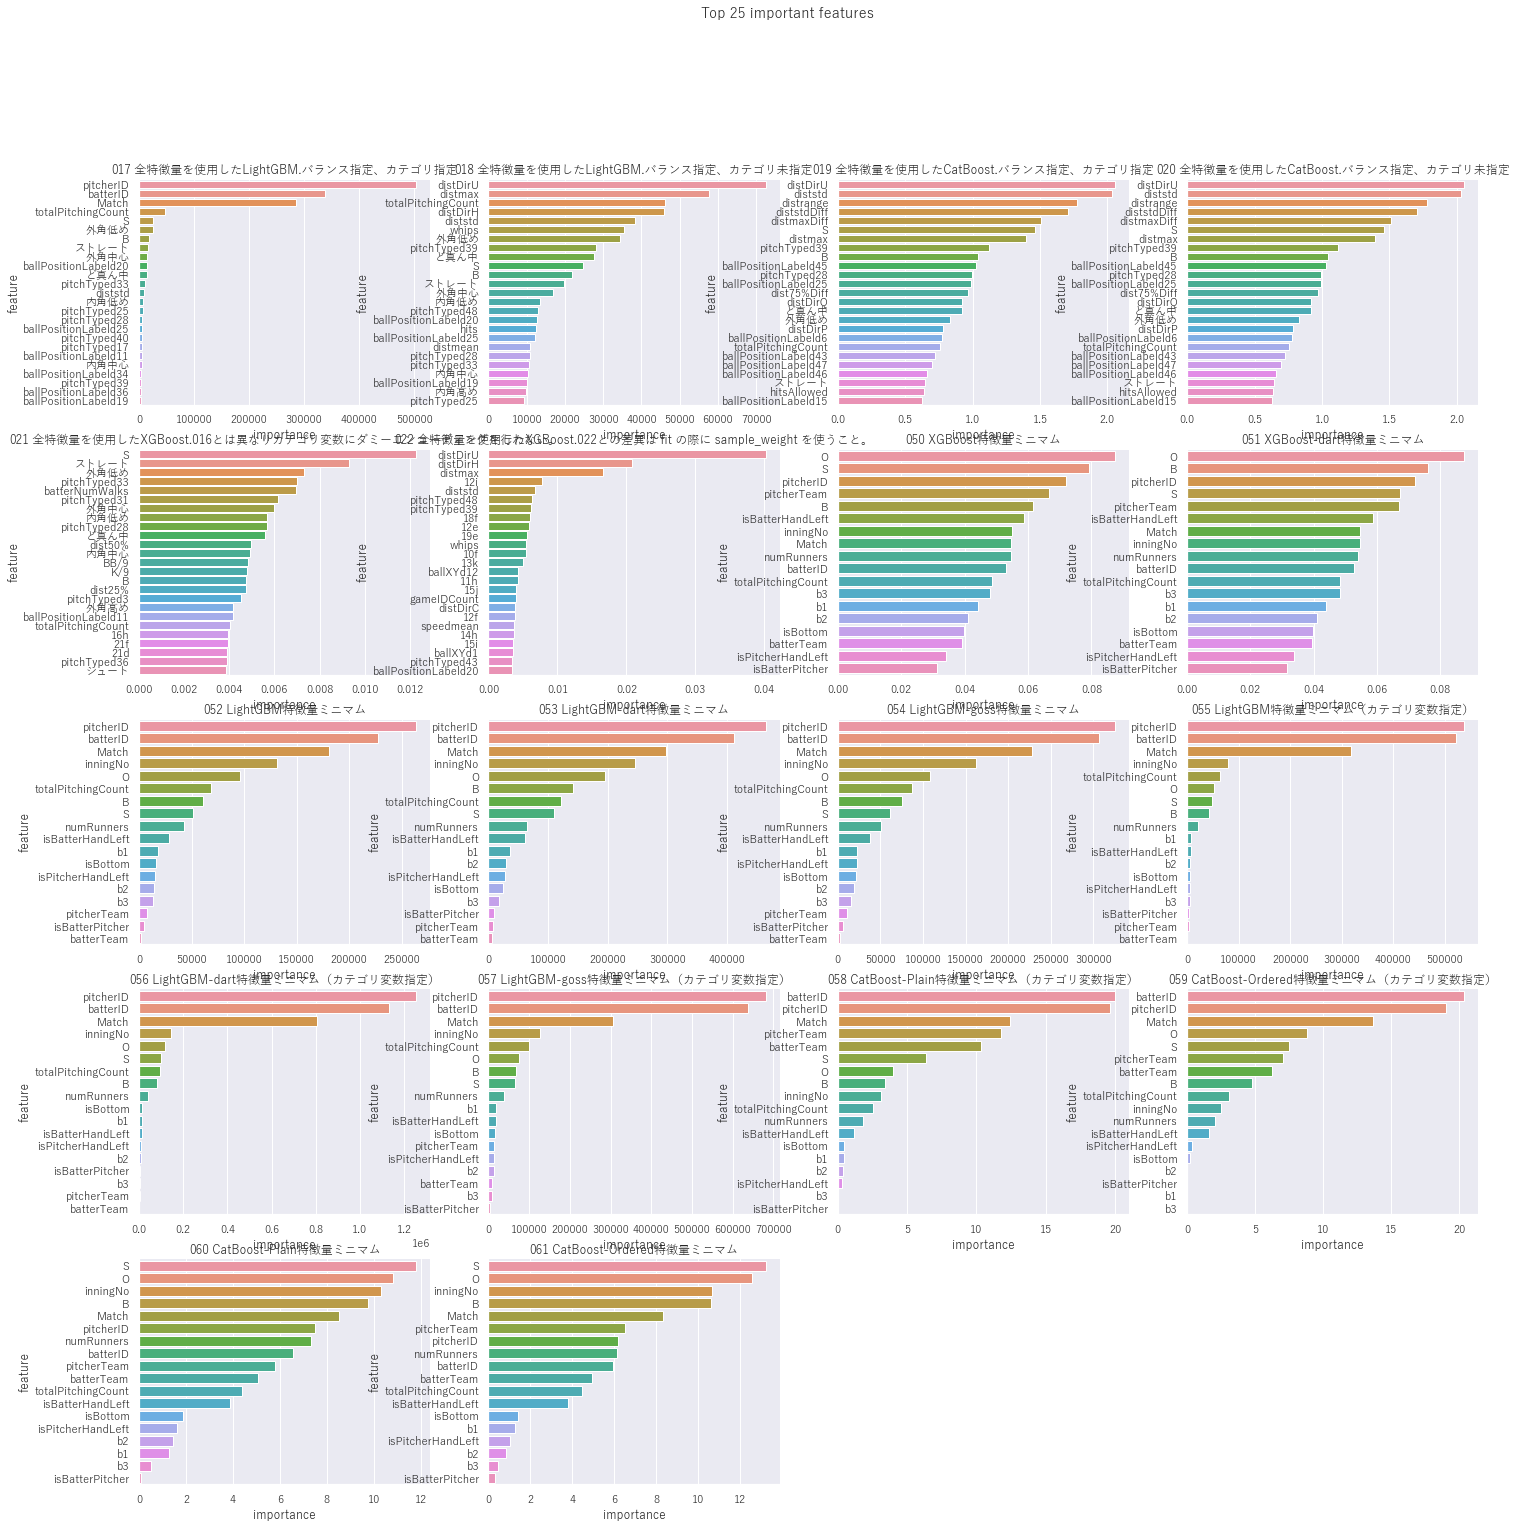

In [14]:
fig = plt.figure(figsize=(24., 24.))
fig.suptitle('Top 25 important features')
for i, (exp_no, df) in enumerate(imp_df.groupby('expNo')):
    plt.subplot(5, 4, i + 1)
    sns.barplot(y='feature', x='importance', data=df.sort_values('importanceRank').head(25))
    plt.title(exp_no + ' ' + submissions.query(f'expNo == "{exp_no}"').Note.values[0])
    sns.despine()

# Confusion matrices

In [7]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [11]:
for filepath in glob.glob(os.path.join('*', 'cross_validation.csv')):
    cv_result = pd.read_csv(filepath)
    dirname = os.path.dirname(filepath)
    exp_no = dirname[:3]
    experiment = submissions.query(f'expNo == "{exp_no}"').Note.values[0]
    print(f'--------------------{exp_no}: {experiment}--------------------')
    for fold in np.sort(cv_result.fold.unique()):
        for i in np.sort(cv_result.train.unique()):
            print(f'Fold: {fold}, train: {i}')
            _ = cv_result.query(f'fold == {fold} and train == {i}')
            print(confusion_matrix(_.actual, _.prediction, labels=y_labels))
            print()

--------------------007: 全特徴量を使用したKNN--------------------
Fold: 1, train: 0
[[4828  823  425  239   15    3    0    0]
 [2346 1844  265  202   23    1    0    1]
 [1482  509  861  126   10    2    0    2]
 [ 971  349  201  597   15    3    0    0]
 [ 345  133   54   95   47    1    0    0]
 [ 111   24   12   35    1    4    0    0]
 [   5    4    1    1    0    0    0    0]
 [  66   17   11   20    2    1    0    3]]

Fold: 2, train: 0
[[4821  798  469  219   23    3    0    0]
 [2384 1817  259  195   25    1    0    1]
 [1431  507  910  129   13    1    0    1]
 [ 991  339  209  565   28    3    0    1]
 [ 342  123   57   95   56    1    0    1]
 [ 105   29   15   26    5    7    0    0]
 [   5    5    1    0    0    0    0    0]
 [  62   20    8   23    3    1    0    3]]

Fold: 3, train: 0
[[4896  799  403  211   21    1    0    2]
 [2395 1790  285  193   15    1    0    3]
 [1505  479  867  129   11    1    0    0]
 [1011  367  187  553   13    4    0    1]
 [ 337  121   66  114   

 [   5    9    0   10    0    0    0   96]]

Fold: 5, train: 0
[[5193  600  440   77   14    4    3    2]
 [ 432 3895  274   64    6    1    4    6]
 [ 206  274 2373   62   56   10    1   10]
 [ 105  115   37 1872    7    0    0    0]
 [  36   34   10   49  546    0    0    0]
 [   5   13    2   17    1  149    0    0]
 [   1    0    0    1    0    0    9    0]
 [   7    5    3    9    0    0    0   96]]

--------------------014: 全特徴量を使用したSVM. class_weight を指定。Cは0.1--------------------
Fold: 1, train: 0
[[2012  467 1516  769  865  459   11  234]
 [1258  696  933  630  718  289    6  152]
 [ 470  255 1189  384  441  159    1   93]
 [ 186  117  481  695  386  166    0  105]
 [  26   17  140   50  365   53    0   24]
 [   7    5   14   10   14  136    0    1]
 [   0    0    2    0    0    0    8    1]
 [   1    0    9    3    6    4    0   97]]

Fold: 2, train: 0
[[2227  389 1278 1151  582  441   12  253]
 [1367  649  776  981  430  312    8  159]
 [ 580  236 1057  581  277  152    2  107

[[2815 1489 1005  472  278  142   10  122]
 [ 755 2653  539  394  193   79    8   61]
 [ 520  557 1418  262  132   57    2   44]
 [  64   61  173 1714   91   11    0   22]
 [  12   13   22   63  561    0    0    4]
 [   4    2    3   17    7  152    0    2]
 [   0    0    0    2    0    0    9    0]
 [   2    1    2   11    5    1    0   98]]

Fold: 4, train: 0
[[2591 1648 1063  479  282  139   11  120]
 [ 661 2680  578  410  188   90   10   65]
 [ 483  601 1395  254  149   61    2   47]
 [  61   61  213 1683   92   11    2   13]
 [  10    8   34   55  562    0    0    6]
 [   2    2   11   15    6  150    0    1]
 [   0    0    0    1    1    0    9    0]
 [   2    3    2   11    4    0    0   98]]

Fold: 5, train: 0
[[2742 1615 1019  437  255  127   10  128]
 [ 752 2692  566  355  165   82    7   63]
 [ 488  577 1414  242  165   56    1   49]
 [  51   70  208 1695   85   12    0   15]
 [  12    8   26   64  561    1    0    3]
 [   1    8   10   13    4  150    0    1]
 [   0    0   

 [   0    1    5    7    0    1    0  106]]

Fold: 5, train: 0
[[2374 1760 1089  457  271  129   18  235]
 [ 721 2593  644  292  179   92   11  150]
 [ 485  550 1397  233  170   60    3   94]
 [ 100   97  236 1437   85   47    5  129]
 [  17   12   24   55  537    4    2   24]
 [   2    5    9    9    4  152    1    5]
 [   0    0    0    1    1    0    9    0]
 [   0    3    7    3    6    0    0  101]]

--------------------043: SVM(C=0.1)特徴量ミニマム--------------------
Fold: 1, train: 0
[[1437 2257  378  432  805  476   14  534]
 [ 638 2231  190  333  496  350    5  439]
 [ 493  678  322  361  568  334    2  234]
 [ 349  500  163  345  417  217    1  144]
 [  94  149   38   54  212   85    0   43]
 [  22   35    6   13    8   94    0    9]
 [   2    0    1    0    0    0    8    0]
 [   6   11    3    2    8    5    0   85]]

Fold: 2, train: 0
[[1438 2299  889  203  705  293   12  494]
 [ 656 2250  449  154  483  252    7  431]
 [ 510  681  788  114  465  167    2  265]
 [ 354  487  525 

 [  77   27   14    2    0    0    0    0]]

Fold: 4, train: 0
[[4916  934  394   77   10    1    0    1]
 [2362 1970  273   67   10    0    0    0]
 [1511  496  907   71    7    0    0    0]
 [1147  440  341  203    5    0    0    0]
 [ 399  129   92   28   27    0    0    0]
 [ 114   51   16    4    0    2    0    0]
 [   7    3    0    1    0    0    0    0]
 [  69   34   16    0    1    0    0    0]]

Fold: 5, train: 0
[[4937  911  398   76   10    1    0    0]
 [2352 2000  263   56   11    0    0    0]
 [1486  535  887   75    8    1    0    0]
 [1162  425  314  231    4    0    0    0]
 [ 393  141   87   28   26    0    0    0]
 [ 115   50   19    3    0    0    0    0]
 [   7    2    1    0    0    0    1    0]
 [  79   29   10    2    0    0    0    0]]

--------------------048: ロジスティック回帰特徴量ミニマム--------------------
Fold: 1, train: 0
[[1758 1159  750  815  811  581   32  427]
 [ 645 1835  491  519  475  393   27  297]
 [ 349  427  869  459  446  257   12  173]
 [ 223  247  280  

 [   7    5    1    2    4    4    0   97]]

Fold: 3, train: 0
[[1803 1680  763  699  604  377   34  373]
 [ 671 2161  441  428  410  278   16  277]
 [ 392  543 1004  387  298  198    9  161]
 [ 259  357  247  789  233  129   14  108]
 [  58   78   38   43  397   29    2   30]
 [   8    8    3    8    4  154    0    2]
 [   1    0    0    0    0    1    9    0]
 [   6    3    3    2    3    2    0  101]]

Fold: 4, train: 0
[[1724 1763  828  718  568  336   19  377]
 [ 628 2213  516  447  356  221   18  283]
 [ 383  546 1011  417  277  173   16  169]
 [ 239  355  277  821  188  107    8  141]
 [  41   64   61   46  397   22    2   42]
 [   7    6    7    6    6  151    1    3]
 [   2    0    0    0    0    0    9    0]
 [   5    8    2    3    3    0    0   99]]

Fold: 5, train: 0
[[1820 1754  703  696  612  370   18  360]
 [ 707 2215  377  413  407  263   13  287]
 [ 430  549  913  402  315  196    6  181]
 [ 261  376  222  792  225  112    8  140]
 [  67   76   32   41  400   27    0 

[[2027 1168  655 1038  769  394   25  257]
 [ 658 2044  420  685  431  240   22  182]
 [ 346  372  932  619  424  172   11  116]
 [ 202  218  175 1203  189   92    6   51]
 [  32   26   26   37  536   11    1    6]
 [  11    2    0   12    5  154    1    2]
 [   2    0    0    1    0    0    8    0]
 [   2    6    6    7    3    0    0   96]]

Fold: 2, train: 0
[[2029 1170  676 1017  781  394   31  235]
 [ 749 1987  414  642  462  256   18  154]
 [ 370  398  940  608  394  167   10  105]
 [ 211  234  179 1179  196   81    9   47]
 [  32   25   29   43  529   11    0    6]
 [   5    8    6   11    4  153    0    0]
 [   0    2    0    0    0    0    9    0]
 [   8    3    5    4    3    1    0   96]]

Fold: 3, train: 0
[[2076 1198  621 1019  746  385   28  260]
 [ 740 1954  397  708  448  235   28  172]
 [ 380  385  892  655  402  157   12  109]
 [ 230  235  151 1205  183   82    5   45]
 [  31   28   17   42  537   11    1    8]
 [   9    8    5    9    4  151    0    1]
 [   1    0   

## 2021-06-01

- 特徴量エンジニアリング1段落。対象データは "experiments/001_EDA/" の "test_data_preprocessed.csv" "train_data_preprocessed.csv" である。
- 7番以降で以下のサブを作成する。14通りある。
  - KNN: 1通り
  - SVM(C={0.1, 1.0, 10.0, 100.0}, class_weights={None, 'balanced'}): 8通り
  - XGBoost: 1通り
  - CatBoost(class_weights={None, 'balanced'}): 2通り
  - LightGBM(class_weights={None, 'balanced'}): 2通り
- うまくいったら8,9のノートブックを改良すること

## 2021-06-02

- GBDT のモデルは `class_weights` 指定なしではお話にならないような性能になる
- XGBoost はカテゴリ変数を投じられないのでダミー変数化したが悲惨な性能（016）
  - 022 のノートブックに sample_weight を scikit-learn 的な class_weights の発送から求める例あり
- ベクトルとカテゴリの特徴量を 001_EDA\features に外部化しておいた
  - PCAで次元数をおおむね1/3程度に削減できそう
- 17, 18,19,20, は sub した。22を送信すること。

## 2021-06-03

- 正直一気に特徴突っ込んじゃって何が何だかよくわからない
- 特にベクトルの特徴量は数が多くてやっかい。

## 2021-06-04

- Public LB で SVM が最高パフォーマンス。三塁打(6)は一切予測していない。
  - 他に比べてホームラン(7)をよく当ててるとかか？
  - あるいは Public LB 自体あまり信用しないべきか？
- 今日はたくさんモデルを作った、三塁打も予測に入っているので早く送りたい。
  - GBDTも結構作った。こいつらがSVMに勝てないとなると。
- 特徴量のアイデアは後はベクトル特徴量をどうモデルに反映するか。後は公開カーネルの特徴量を拝借する。

## 2021-06-05

In [12]:
%%time
!jupyter nbconvert --execute "023.ipynb" --to notebook --inplace

Wall time: 2h 20min 7s


[NbConvertApp] Converting notebook 023.ipynb to notebook
[NbConvertApp] Writing 110176 bytes to 023.ipynb


In [13]:
%%time
!jupyter nbconvert --execute "024.ipynb" --to notebook --inplace

Wall time: 1h 47min 17s


[NbConvertApp] Converting notebook 024.ipynb to notebook
[NbConvertApp] Writing 110192 bytes to 024.ipynb


In [14]:
%%time
!jupyter nbconvert --execute "025.ipynb" --to notebook --inplace

Wall time: 22min 55s


[NbConvertApp] Converting notebook 025.ipynb to notebook
Traceback (most recent call last):
  File "C:\Users\nndropout\miniconda3\envs\ds\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\nbconvert\nbconvertapp.py", line 489, in convert_single_notebook
 

In [15]:
%%time
!jupyter nbconvert --execute "026.ipynb" --to notebook --inplace

Wall time: 1h 40min 35s


[NbConvertApp] Converting notebook 026.ipynb to notebook
[NbConvertApp] Writing 110556 bytes to 026.ipynb


In [16]:
%%time
!jupyter nbconvert --execute "027.ipynb" --to notebook --inplace

Wall time: 2h 7min 22s


[NbConvertApp] Converting notebook 027.ipynb to notebook
[NbConvertApp] Writing 110275 bytes to 027.ipynb


In [17]:
%%time
!jupyter nbconvert --execute "028.ipynb" --to notebook --inplace

Wall time: 1h 43min 58s


[NbConvertApp] Converting notebook 028.ipynb to notebook
[NbConvertApp] Writing 110288 bytes to 028.ipynb


In [18]:
%%time
!jupyter nbconvert --execute "029.ipynb" --to notebook --inplace

Wall time: 1h 39min 44s


[NbConvertApp] Converting notebook 029.ipynb to notebook
[NbConvertApp] Writing 110271 bytes to 029.ipynb


In [19]:
%%time
!jupyter nbconvert --execute "030.ipynb" --to notebook --inplace

Wall time: 1h 23min 1s


[NbConvertApp] Converting notebook 030.ipynb to notebook
[NbConvertApp] Writing 110355 bytes to 030.ipynb


In [30]:
%%time
!jupyter nbconvert --execute "031.ipynb" --to notebook --inplace

Wall time: 3min 31s


[NbConvertApp] Converting notebook 031.ipynb to notebook
[NbConvertApp] Writing 106677 bytes to 031.ipynb


In [31]:
%%time
!jupyter nbconvert --execute "032.ipynb" --to notebook --inplace

Wall time: 3min 1s


[NbConvertApp] Converting notebook 032.ipynb to notebook
[NbConvertApp] Writing 106733 bytes to 032.ipynb


In [33]:
%%time
!jupyter nbconvert --execute "033.ipynb" --to notebook --inplace

Wall time: 15min 57s


[NbConvertApp] Converting notebook 033.ipynb to notebook
C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

In [23]:
%%time
!jupyter nbconvert --execute "034.ipynb" --to notebook --inplace

Wall time: 12min 51s


[NbConvertApp] Converting notebook 034.ipynb to notebook
C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\joblib\externals\loky\backend\resource_tracker.py:320: UserWarning: resource_tracker: There appear to be 1 leaked folder objects to clean up at shutdown
  (len(rtype_registry), rtype))
[NbConvertApp] Writing 117661 bytes to 034.ipynb


In [34]:
%%time
!jupyter nbconvert --execute "037.ipynb" --to notebook --inplace

Wall time: 18min


[NbConvertApp] Converting notebook 037.ipynb to notebook
[NbConvertApp] Writing 88263 bytes to 037.ipynb


In [25]:
%%time
!jupyter nbconvert --execute "038.ipynb" --to notebook --inplace

Wall time: 2min 56s


[NbConvertApp] Converting notebook 038.ipynb to notebook
[NbConvertApp] Writing 88288 bytes to 038.ipynb


In [26]:
%%time
!jupyter nbconvert --execute "039.ipynb" --to notebook --inplace

[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negativ

[NbConvertApp] Converting notebook 039.ipynb to notebook
[NbConvertApp] Writing 85764 bytes to 039.ipynb


In [27]:
%%time
!jupyter nbconvert --execute "040.ipynb" --to notebook --inplace

[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negativ

[NbConvertApp] Converting notebook 040.ipynb to notebook
[NbConvertApp] Writing 85814 bytes to 040.ipynb


In [28]:
%%time
!jupyter nbconvert --execute "041.ipynb" --to notebook --inplace

Wall time: 9min 5s


[NbConvertApp] Converting notebook 041.ipynb to notebook
[NbConvertApp] Writing 183732 bytes to 041.ipynb


In [29]:
%%time
!jupyter nbconvert --execute "042.ipynb" --to notebook --inplace

Wall time: 4min 4s


[NbConvertApp] Converting notebook 042.ipynb to notebook
[NbConvertApp] Writing 182422 bytes to 042.ipynb
